In [1]:
import networkx as nx
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
import os
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('full_data_updated.csv')
df = df.sort_values('challengeId').reset_index(drop=True)

In [3]:
df.head()

,challengeId,task_created_date,handle,Activity Type,activechallenges,completedchallenges,totalChallengsJoined,totalWins,Success_rate (%),task_recency (in days),member_skills,member_description,task_name,task_languages,task_description,Cosine_similarity_score_task_titles_current_past,Cosine_similarity_score_task_descriptions_current_past,Cosine_similarity_score_task_skills_current_past,Cosine_similarity_descriptions,Cosine_similarity_skills
0,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,aaron2017,CODE,0.0,50.0,294.0,36.0,12.24,837.0,"AWS, DocuSign, QA, Apache Kafka, API, Docker, ...",I started learning programming after I entered...,Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,1.000000,1.000000,1.000000,0.431261,0.706789
1,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,Narekvar90,CODE,1.0,50.0,2476.0,11.0,0.44,607.0,"AWS, DocuSign, Google Cloud, DevOps, Ajax, Alg...","I'm full stack web developer, with good algori...",Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,1.000000,1.000000,1.000000,0.429455,0.578845
2,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,wcheung,CODE,6.0,50.0,7859.0,86.0,1.09,711.0,"Microservices, Android, AngularJS, Apex, API, ...",All-time champion of CloudSpokes (1 of 1). Ind...,Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,0.897434,0.908987,0.879051,0.166501,0.663067
3,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,Ghostar,CODE,4.0,50.0,814.0,372.0,45.70,NaN,"AWS, Mobile, .NET, ActionScript, Active Direct...",Project management using crowd-sourced softwar...,Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,1.000000,1.000000,1.000000,0.403576,0.153573
4,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,SandhiyaA,CODE,3.0,28.0,100.0,16.0,16.00,921.0,"QA, Selenium, Android, Appium, Excel, Git, Git...",QA tester,Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,1.000000,1.000000,1.000000,0.223391,-0.108519


In [4]:
df.shape

(21606, 20)

In [5]:
df.columns

Index(['challengeId', 'task_created_date', 'handle', 'Activity Type',
       'activechallenges', 'completedchallenges', 'totalChallengsJoined',
       'totalWins', 'Success_rate (%)', 'task_recency (in days)',
       'member_skills', 'member_description', 'task_name', 'task_languages',
       'task_description', 'Cosine_similarity_score_task_titles_current_past',
       'Cosine_similarity_score_task_descriptions_current_past',
       'Cosine_similarity_score_task_skills_current_past',
       'Cosine_similarity_descriptions', 'Cosine_similarity_skills'],
      dtype='object')

In [6]:
# Check NaN values in task_recency(in days) column
df['task_recency (in days)'].isnull().sum()

2464

This means there are 2464 mebers who have less than 15 tasks in the data.

In [7]:
# Unique handles & challenge_ids
handles = df['handle'].unique()
challenge_ids = df['challengeId'].unique()

In [8]:
# Extract developers & challenges to calculate the count of interactions
dev1 = []
dev2 = []
ids = []
for i in challenge_ids:
  challenge_df = df[df['challengeId']==i]
  unique_handles = challenge_df['handle'].unique()
  for handle1 in unique_handles:
    for handle2 in unique_handles:
      if handle1!=handle2:
        ids.append(i)
        dev1.append(handle1)
        dev2.append(handle2)

In [9]:
df1 = pd.DataFrame(ids, columns=['challengeId'])
df1['Developer1'] = dev1
df1['Developer2'] = dev2

In [10]:
df1.head()

,challengeId,Developer1,Developer2
0,00080061-9cca-49fd-90d6-0ca64dc776fd,aaron2017,Narekvar90
1,00080061-9cca-49fd-90d6-0ca64dc776fd,aaron2017,wcheung
2,00080061-9cca-49fd-90d6-0ca64dc776fd,aaron2017,Ghostar
3,00080061-9cca-49fd-90d6-0ca64dc776fd,aaron2017,SandhiyaA
4,00080061-9cca-49fd-90d6-0ca64dc776fd,Narekvar90,aaron2017


In [11]:
df1.shape

(156450, 3)

In [12]:
# Function to drop duplicates
def drop_duplicates_devs(df):
    df2 = df.copy()
    df2['devs'] = df2['Developer1']+ ' '+ df2['Developer2']
    df2['devs'] = df2['devs'].apply(lambda x: ' '.join(sorted(x.split())))
    # drop duplicates 
    new_df = []
    for id in df2['challengeId'].unique():
      id_df = df2[df2['challengeId']==id]
      id_df.drop_duplicates(subset=['devs'], inplace=True)
      new_df.append(id_df)
    new_df = pd.concat(new_df)
    new_df = new_df.reset_index(drop=True)
    return new_df

In [13]:
# Apply above function 
final_df = drop_duplicates_devs(df1)

In [14]:
final_df.head()

,challengeId,Developer1,Developer2,devs
0,00080061-9cca-49fd-90d6-0ca64dc776fd,aaron2017,Narekvar90,Narekvar90 aaron2017
1,00080061-9cca-49fd-90d6-0ca64dc776fd,aaron2017,wcheung,aaron2017 wcheung
2,00080061-9cca-49fd-90d6-0ca64dc776fd,aaron2017,Ghostar,Ghostar aaron2017
3,00080061-9cca-49fd-90d6-0ca64dc776fd,aaron2017,SandhiyaA,SandhiyaA aaron2017
4,00080061-9cca-49fd-90d6-0ca64dc776fd,Narekvar90,wcheung,Narekvar90 wcheung


In [15]:
# Calculate interaction count
interaction_df = final_df.groupby('devs')['challengeId'].count().reset_index(drop=False).rename(columns={'challengeId':'Interaction_count'}).\
sort_values('Interaction_count', ascending=True).reset_index(drop=True)
interaction_df.head()

,devs,Interaction_count
0,-pegol- KishuPro,1
1,crash457 vikasverma,1
2,crash457 vikramsnehi,1
3,crash457 w_maozzam,1
4,crash457 wangchong756,1


In [16]:
interaction_df['Developer1'] = interaction_df['devs'].apply(lambda x:x.split()[0])
interaction_df['Developer2'] = interaction_df['devs'].apply(lambda x:x.split()[1])
# Add challengeId to intercation_df 
interaction_df = interaction_df.merge(final_df[['challengeId', 'devs']], on='devs', how='outer')

In [17]:
interaction_df.head()

,devs,Interaction_count,Developer1,Developer2,challengeId
0,-pegol- KishuPro,1,-pegol-,KishuPro,da7492e7-02ed-498b-ad57-10f4a6c0706d
1,crash457 vikasverma,1,crash457,vikasverma,42294b1c-7c9a-475e-befd-06061064b9b6
2,crash457 vikramsnehi,1,crash457,vikramsnehi,61940253-539f-40e6-ae72-76b87e26724b
3,crash457 w_maozzam,1,crash457,w_maozzam,5f918d52-61ff-4ba1-8143-f9ed49560b44
4,crash457 wangchong756,1,crash457,wangchong756,3aebd5b4-f6b7-4488-8459-fe696a19e00c


In [18]:
# Save the interaction_df in csv 
# interaction_df.to_csv('developer_interaction_data.csv', index=False)

### Weighted Social Networks

In this we add weight to the network, each edge has a weight signifying the the strength of collaboration among them as a count of the number of interactions in terms of the frequency of the number of challenges participated by the developers..

In [19]:
# create an empty undirected graph
G_weighted = nx.Graph()

# add edge to the graph
dev1_list = interaction_df['Developer1'].tolist()
dev2_list = interaction_df['Developer2'].tolist()
weight_list = interaction_df['Interaction_count'].tolist()

for d1, d2, w in zip(dev1_list, dev2_list, weight_list):
  G_weighted.add_edge(d1, d2,   weight=w)
print(nx.info(G_weighted))

Graph with 1117 nodes and 22198 edges


In [20]:
# Sum of the weights on the edges in graph
sum_weights_edges = G_weighted.size(weight='weight')
print(sum_weights_edges)

78213.0


In [21]:
# Graph
Vp = G_weighted.number_of_nodes()    # Total number of nodes/developers 
Ep =G_weighted.number_of_edges()    # Total number of edges
print(f'Total number of nodes : {Vp}')
print(f'Total number of edges : {Ep}')

Total number of nodes : 1117
Total number of edges : 22198


Now, let's compute following 2 measures for each subgraph:      
1. Sub-graph connectivity 
2. Sum of the weights on the edges 

### Subgraphs

In [22]:
# extract subgraphs
sub_graphs = [G_weighted.subgraph(c) for c in nx.connected_components(G_weighted)]
print(f'Number of Subgraphs : {len(sub_graphs)}')

print('Nodes in each Subgraph : ')
for i, sg in enumerate(sub_graphs):
  print(f'Subgraph : {i+1}')
  print(sg.nodes)

Number of Subgraphs : 1
Nodes in each Subgraph : 
Subgraph : 1
['-pegol-', 'KishuPro', 'crash457', 'vikasverma', 'vikramsnehi', 'w_maozzam', 'wangchong756', 'yuqiuge', 'crazycoder05', 'iqbalhood', 'iversonLv', 'ketzjs09', 'seriyvolk83', 'talesforce', 'wcheung', 'creeya', 'cunhavictor', 'dwoolley3', 'e06widu', 'fatkhulkarim', 'goldenmacopy', 'gurmeetb', 'haritsfahreza', 'invok3d', 'jkuppal26', 'konthet', 'lydialmz', 'marioskranitsas', 'menon.gayu142', 'mfrank37', 'mike4ty4', 'mohamed_sakr', 'neenasatija9300', 'nestwasp', 'veshu', 'vaambival', 'ucupio', 'tranglee', 'jeevan900929', 'ketantoo', 'kotamanegi', 'kshitiz305', 'kumarshovit', 'lavisht22', 'lekiam', 'liuliquan', 'mirzailhami', 'mishacucicea', 'nghi12', 'nishi_priya', 'nithyaasworld', 'obog', 'nneeri', 'pawan.it', 'prashant23', 'prijindal', 'rahulghose', 'rahuls91221', 'shimaahmedd', 'shreeots', 'simransuresh', 'skr-suyash', 'sonam0409', 'songzy12', 'suresh1187', 'sweigoh0314', 't_bone_289', 'phytospace', 'prabhsimran', 'rachitras

#### Plot Subgraph 1

Sum of the weights on the edges in Subgraph 1 :
78213.0


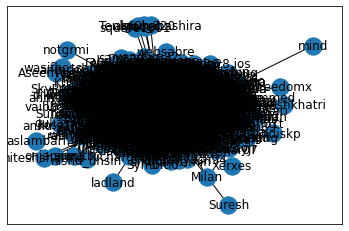

In [23]:
pos = nx.spring_layout(G_weighted)  #setting the positions with respect to G
SG1 = sub_graphs[0]  

plt.figure()
nx.draw_networkx(SG1, pos=pos)

print('Sum of the weights on the edges in Subgraph 1 :')
sum_weights_edges1 = SG1.size(weight='weight')
print(sum_weights_edges1)

 **Sub-graph connectivity**   
We need the total number of edges & the total number of nodes in the sub graph to find the sub-graph connectivity.

In [24]:
Vp1 = SG1.number_of_nodes()    # Total number of nodes/developers 
Ep1 =SG1.number_of_edges()    # Total number of edges
print(f'Total number of nodes : {Vp1}')
print(f'Total number of edges : {Ep1}')
denominator = abs(Vp1)*(abs(Vp1)-1)/2 
coefficient_value1 = abs(Ep1)/denominator
print(f'Sub-graph connectivity value : {coefficient_value1}')

Total number of nodes : 1117
Total number of edges : 22198
Sub-graph connectivity value : 0.035614469120115004


In [25]:
# Collaborative Preference CP score for sub graph 1
CP_score1 = coefficient_value1*sum_weights_edges1
print(CP_score1)

2785.5144732915546


In [26]:
# Groupby Developer 1 to get the number of interactions with other other developers 
df_intr = final_df.groupby(['Developer1','challengeId'])['devs'].count().reset_index(drop=False)
df_intr = df_intr.rename(columns={'Developer1':'handle','devs':'number_interactions'})
df_intr.head()

,handle,challengeId,number_interactions
0,-pegol-,da7492e7-02ed-498b-ad57-10f4a6c0706d,2
1,143Topcoder,c11b8a13-c6f0-44e2-aa4f-fd2373d49a20,6
2,143Topcoder,f2f55f38-e029-4b2e-9045-21635b896e6b,4
3,1Digital,a16a5fb2-9140-4467-9206-baf20181f52e,1
4,1starain43,b2b5ff6a-de66-42a0-a08f-ab2c564071f7,9


In [27]:
# Check weights(Interaction_count) on each edge for Sub graph 1
sg1_df = df_intr[df_intr['handle'].isin(SG1.nodes())]
# Add coefficient_value & sum_weights_edges
sg1_df['sum_weights_edges'] = sum_weights_edges1
sg1_df['Coefficient_value'] = coefficient_value1
sg1_df['CP_score'] = sg1_df['Coefficient_value']*sg1_df['number_interactions']
sg1_df

,handle,challengeId,number_interactions,sum_weights_edges,Coefficient_value,CP_score
0,-pegol-,da7492e7-02ed-498b-ad57-10f4a6c0706d,2,78213.0,0.035614,0.071229
1,143Topcoder,c11b8a13-c6f0-44e2-aa4f-fd2373d49a20,6,78213.0,0.035614,0.213687
2,143Topcoder,f2f55f38-e029-4b2e-9045-21635b896e6b,4,78213.0,0.035614,0.142458
3,1Digital,a16a5fb2-9140-4467-9206-baf20181f52e,1,78213.0,0.035614,0.035614
4,1starain43,b2b5ff6a-de66-42a0-a08f-ab2c564071f7,9,78213.0,0.035614,0.320530
...,...,...,...,...,...,...
17342,zigmint,9a437a0a-b4ab-49e9-9c40-2f92db891ec2,7,78213.0,0.035614,0.249301
17343,zigmint,b511c949-a683-40e5-b404-83f9a1d687a5,5,78213.0,0.035614,0.178072
17344,zigmint,b55973be-8d28-48b2-8cad-af4badea1892,6,78213.0,0.035614,0.213687
17345,zuhriyansauqi,aef5c440-16b3-40c6-81e9-371cb7ab0a61,4,78213.0,0.035614,0.142458


In [28]:
df_final = sg1_df.copy()
df_final = df_final.reset_index(drop=True)
df_final.drop('Coefficient_value', axis=1, inplace=True)
df_final

,handle,challengeId,number_interactions,sum_weights_edges,CP_score
0,-pegol-,da7492e7-02ed-498b-ad57-10f4a6c0706d,2,78213.0,0.071229
1,143Topcoder,c11b8a13-c6f0-44e2-aa4f-fd2373d49a20,6,78213.0,0.213687
2,143Topcoder,f2f55f38-e029-4b2e-9045-21635b896e6b,4,78213.0,0.142458
3,1Digital,a16a5fb2-9140-4467-9206-baf20181f52e,1,78213.0,0.035614
4,1starain43,b2b5ff6a-de66-42a0-a08f-ab2c564071f7,9,78213.0,0.320530
...,...,...,...,...,...
17339,zigmint,9a437a0a-b4ab-49e9-9c40-2f92db891ec2,7,78213.0,0.249301
17340,zigmint,b511c949-a683-40e5-b404-83f9a1d687a5,5,78213.0,0.178072
17341,zigmint,b55973be-8d28-48b2-8cad-af4badea1892,6,78213.0,0.213687
17342,zuhriyansauqi,aef5c440-16b3-40c6-81e9-371cb7ab0a61,4,78213.0,0.142458


In [29]:
# Join df_final & df (full data)
join_df = df.merge(df_final, on=['challengeId','handle'], how='outer')
join_df = join_df.sort_values('challengeId').reset_index(drop=True)
# Drop duplicates
join_df = join_df.drop_duplicates().reset_index(drop=True)
join_df.head()

,challengeId,task_created_date,handle,Activity Type,activechallenges,completedchallenges,totalChallengsJoined,totalWins,Success_rate (%),task_recency (in days),member_skills,member_description,task_name,task_languages,task_description,Cosine_similarity_score_task_titles_current_past,Cosine_similarity_score_task_descriptions_current_past,Cosine_similarity_score_task_skills_current_past,Cosine_similarity_descriptions,Cosine_similarity_skills,number_interactions,sum_weights_edges,CP_score
0,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,aaron2017,CODE,0.0,50.0,294.0,36.0,12.24,837.0,"AWS, DocuSign, QA, Apache Kafka, API, Docker, ...",I started learning programming after I entered...,Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,1.000000,1.000000,1.000000,0.431261,0.706789,4.0,78213.0,0.142458
1,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,Narekvar90,CODE,1.0,50.0,2476.0,11.0,0.44,607.0,"AWS, DocuSign, Google Cloud, DevOps, Ajax, Alg...","I'm full stack web developer, with good algori...",Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,1.000000,1.000000,1.000000,0.429455,0.578845,3.0,78213.0,0.106843
2,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,wcheung,CODE,6.0,50.0,7859.0,86.0,1.09,711.0,"Microservices, Android, AngularJS, Apex, API, ...",All-time champion of CloudSpokes (1 of 1). Ind...,Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,0.897434,0.908987,0.879051,0.166501,0.663067,2.0,78213.0,0.071229
3,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,Ghostar,CODE,4.0,50.0,814.0,372.0,45.70,NaN,"AWS, Mobile, .NET, ActionScript, Active Direct...",Project management using crowd-sourced softwar...,Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,1.000000,1.000000,1.000000,0.403576,0.153573,1.0,78213.0,0.035614
4,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,SandhiyaA,CODE,3.0,28.0,100.0,16.0,16.00,921.0,"QA, Selenium, Android, Appium, Excel, Git, Git...",QA tester,Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,1.000000,1.000000,1.000000,0.223391,-0.108519,NaN,NaN,NaN


In [30]:
join_df.isnull().sum()

challengeId                                                  0
task_created_date                                            0
handle                                                       0
Activity Type                                                0
activechallenges                                             0
completedchallenges                                          0
totalChallengsJoined                                         0
totalWins                                                    0
Success_rate (%)                                             0
task_recency (in days)                                    2464
member_skills                                                0
member_description                                           0
task_name                                                    0
task_languages                                               0
task_description                                             0
Cosine_similarity_score_task_titles_current_past       

In [31]:
join_df.shape

(21606, 23)

In [32]:
join_df.to_csv('full_dataset_updated_with_NANs.csv', index=False)

In [33]:
# Drop null values
join_df1 = join_df.dropna().reset_index(drop=True)
join_df1.head()

,challengeId,task_created_date,handle,Activity Type,activechallenges,completedchallenges,totalChallengsJoined,totalWins,Success_rate (%),task_recency (in days),member_skills,member_description,task_name,task_languages,task_description,Cosine_similarity_score_task_titles_current_past,Cosine_similarity_score_task_descriptions_current_past,Cosine_similarity_score_task_skills_current_past,Cosine_similarity_descriptions,Cosine_similarity_skills,number_interactions,sum_weights_edges,CP_score
0,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,aaron2017,CODE,0.0,50.0,294.0,36.0,12.24,837.0,"AWS, DocuSign, QA, Apache Kafka, API, Docker, ...",I started learning programming after I entered...,Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,1.000000,1.000000,1.000000,0.431261,0.706789,4.0,78213.0,0.142458
1,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,Narekvar90,CODE,1.0,50.0,2476.0,11.0,0.44,607.0,"AWS, DocuSign, Google Cloud, DevOps, Ajax, Alg...","I'm full stack web developer, with good algori...",Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,1.000000,1.000000,1.000000,0.429455,0.578845,3.0,78213.0,0.106843
2,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,wcheung,CODE,6.0,50.0,7859.0,86.0,1.09,711.0,"Microservices, Android, AngularJS, Apex, API, ...",All-time champion of CloudSpokes (1 of 1). Ind...,Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,0.897434,0.908987,0.879051,0.166501,0.663067,2.0,78213.0,0.071229
3,0012cf9f-d058-481c-9f54-b0ed6f0e5203,2014-09-24 21:00:00,spanhawk,CODE,0.0,48.0,303.0,48.0,15.84,2204.0,".NET, Android, AngularJS, API, Bootstrap, C#, ...",I am a developer and love to develop apps that...,[serenity] Discussion API Service on NodeJS an...,"Node.js, API, REST, NodeJS",We are excited to start utlizing a module whic...,1.000000,1.000000,1.000000,0.220022,0.734191,1.0,78213.0,0.035614
4,0013bd2a-491a-484c-be88-a842fd887acb,2020-02-15 00:00:00,irammkahhkashan,CODE,0.0,0.0,52.0,0.0,0.00,1092.0,"Android, Java, JavaScript","I am a Full Stack web Developer,java Developer...",Topcoder Legacy App - Accommodate the member s...,"JavaScript, Angular.js (1.0), HTML, NodeJS",Challenge Objectives\t\tUpdate the Legacy Comm...,1.000000,1.000000,1.000000,0.355715,0.652396,6.0,78213.0,0.213687


In [34]:
join_df1.head(500)

,challengeId,task_created_date,handle,Activity Type,activechallenges,completedchallenges,totalChallengsJoined,totalWins,Success_rate (%),task_recency (in days),member_skills,member_description,task_name,task_languages,task_description,Cosine_similarity_score_task_titles_current_past,Cosine_similarity_score_task_descriptions_current_past,Cosine_similarity_score_task_skills_current_past,Cosine_similarity_descriptions,Cosine_similarity_skills,number_interactions,sum_weights_edges,CP_score
0,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,aaron2017,CODE,0.0,50.0,294.0,36.0,12.24,837.0,"AWS, DocuSign, QA, Apache Kafka, API, Docker, ...",I started learning programming after I entered...,Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,1.000000,1.000000,1.000000,0.431261,0.706789,4.0,78213.0,0.142458
1,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,Narekvar90,CODE,1.0,50.0,2476.0,11.0,0.44,607.0,"AWS, DocuSign, Google Cloud, DevOps, Ajax, Alg...","I'm full stack web developer, with good algori...",Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,1.000000,1.000000,1.000000,0.429455,0.578845,3.0,78213.0,0.106843
2,00080061-9cca-49fd-90d6-0ca64dc776fd,2021-04-07 09:00:00,wcheung,CODE,6.0,50.0,7859.0,86.0,1.09,711.0,"Microservices, Android, AngularJS, Apex, API, ...",All-time champion of CloudSpokes (1 of 1). Ind...,Topcoder TaaS API - Work Period Automation and...,"NodeJS, Node.js, PostgreSQL, Elasticsearch",## Context### Project ContextTopcoder TaaS API...,0.897434,0.908987,0.879051,0.166501,0.663067,2.0,78213.0,0.071229
3,0012cf9f-d058-481c-9f54-b0ed6f0e5203,2014-09-24 21:00:00,spanhawk,CODE,0.0,48.0,303.0,48.0,15.84,2204.0,".NET, Android, AngularJS, API, Bootstrap, C#, ...",I am a developer and love to develop apps that...,[serenity] Discussion API Service on NodeJS an...,"Node.js, API, REST, NodeJS",We are excited to start utlizing a module whic...,1.000000,1.000000,1.000000,0.220022,0.734191,1.0,78213.0,0.035614
4,0013bd2a-491a-484c-be88-a842fd887acb,2020-02-15 00:00:00,irammkahhkashan,CODE,0.0,0.0,52.0,0.0,0.00,1092.0,"Android, Java, JavaScript","I am a Full Stack web Developer,java Developer...",Topcoder Legacy App - Accommodate the member s...,"JavaScript, Angular.js (1.0), HTML, NodeJS",Challenge Objectives\t\tUpdate the Legacy Comm...,1.000000,1.000000,1.000000,0.355715,0.652396,6.0,78213.0,0.213687
5,0013bd2a-491a-484c-be88-a842fd887acb,2020-02-15 00:00:00,gauravseta,CODE,8.0,50.0,985.0,57.0,5.79,858.0,"QA, 3D Reconstruction, .NET, Android, AngularJ...",Trying best,Topcoder Legacy App - Accommodate the member s...,"JavaScript, Angular.js (1.0), HTML, NodeJS",Challenge Objectives\t\tUpdate the Legacy Comm...,1.000000,1.000000,1.000000,0.213715,0.602638,5.0,78213.0,0.178072
6,0013bd2a-491a-484c-be88-a842fd887acb,2020-02-15 00:00:00,Schpotsky,CODE,12.0,50.0,6470.0,81.0,1.25,489.0,"AWS, QA, Microservices, Android, AngularJS, Ap...",An Independent Software Developer with more th...,Topcoder Legacy App - Accommodate the member s...,"JavaScript, Angular.js (1.0), HTML, NodeJS",Challenge Objectives\t\tUpdate the Legacy Comm...,0.931747,0.908891,0.978732,0.453516,0.667418,4.0,78213.0,0.142458
7,0013bd2a-491a-484c-be88-a842fd887acb,2020-02-15 00:00:00,talesforce,CODE,9.0,50.0,4073.0,165.0,4.05,855.0,"QA, Mobile, .NET, Android, AngularJS, Apex, AP...","Life long developer, passionate about building...",Topcoder Legacy App - Accommodate the member s...,"JavaScript, Angular.js (1.0), HTML, NodeJS",Challenge Objectives\t\tUpdate the Legacy Comm...,1.000000,1.000000,1.000000,0.250023,0.717009,3.0,78213.0,0.106843
8,0013bd2a-491a-484c-be88-a842fd887acb,2020-02-15 00:00:00,Narekvar90,CODE,1.0,50.0,2190.0,11.0,0.50,607.0,"AWS, DocuSign, Google Cloud, DevOps, Ajax, Alg...","I'm full stack web developer, with good algori...",Topcoder Lega

In [35]:
join_df1.shape

(15200, 23)

In [36]:
# Save the full data in csv 
join_df1.to_csv('full_data_updated_with_no_NANs.csv', index=False)